In [56]:
import pandas as pd
import seaborn as sns
from sklearn import svm
from numpy import mean
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score

import pickle

In [57]:
train = pd.read_csv('../../SIFTextraction/fibula/train.csv')
valid = pd.read_csv('../../SIFTextraction/fibula/valid.csv')
valid

,image_file,label,0,1,2,3,4,5,6,7,...,190,191,192,193,194,195,196,197,198,199
0,238.png,1,-0.223978,-0.28954,-0.293326,-0.247374,-0.345317,-0.214806,-0.261917,-0.165444,...,1.573059,-0.18892,-0.249385,-0.221109,-0.329881,0.0,0.0,0.0,0.0,0.0
1,1985.png,1,-0.223978,-0.28954,1.645106,2.561446,-0.345317,-0.214806,-0.261917,-0.165444,...,1.573059,-0.18892,-0.249385,-0.221109,-0.329881,0.0,0.0,0.0,0.0,0.0
2,1751.png,1,-0.223978,-0.28954,-0.293326,-0.247374,1.157473,-0.214806,-0.261917,-0.165444,...,-0.305288,-0.18892,-0.249385,-0.221109,-0.329881,0.0,0.0,0.0,0.0,0.0
3,1441.png,1,-0.223978,-0.28954,-0.293326,-0.247374,-0.345317,-0.214806,-0.261917,-0.165444,...,-0.305288,-0.18892,-0.249385,-0.221109,-0.329881,0.0,0.0,0.0,0.0,0.0
4,699.png,1,-0.223978,-0.28954,-0.293326,-0.247374,-0.345317,-0.214806,-0.261917,-0.165444,...,-0.305288,-0.18892,-0.249385,-0.221109,-0.329881,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,209.png,1,-0.223978,-0.28954,1.645106,-0.247374,-0.345317,-0.214806,-0.261917,-0.165444,...,-0.305288,-0.18892,-0.249385,-0.221109,-0.329881,0.0,0.0,0.0,0.0,0.0
130,966.png,1,-0.223978,-0.28954,-0.293326,-0.247374,1.157473,-0.214806,-0.261917,-0.165444,...,-0.305288,-0.18892,-0.249385,-0.221109,-0.329881,0.0,0.0,0.0,0.0,0.0
131,1184.png,1,-0.223978,-0.28954,-0.293326,-0.247374,-0.345317,1.227630,-0.261917,-0.165444,...,-0.305288,-0.18892,-0.249385,-0.221109,-0.329881,0.0,0.0,0.0,0.0,0.0
132,657.png,1,-0.223978,-0.28954,-0.293326,-0.247374,1.157473,-0.214806,1.295868,-0.165444,...,3.451405,-0.18892,-0.249385,-0.221109,-0.329881,0.0,0.0,0.0,0.0,0.0


In [58]:
X_train = train.drop(columns=['image_file', 'label'])
y_train = train['label']

X_valid = valid.drop(columns=['image_file', 'label'])
y_valid = valid['label']

In [59]:
model = svm.SVC(gamma='scale')

param_grid = {
    'class_weight': ({0:2, 1:1}, {0:4, 1:1}, {0:5,1:1}),
    'kernel': ('rbf', 'sigmoid'),
    'C': (2, 3),
    'degree': (2, 3)
}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1')

grid_result = grid.fit(X_train.values, y_train.values)

# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999091 using {'C': 2, 'class_weight': {0: 2, 1: 1}, 'degree': 2, 'kernel': 'rbf'}
0.999091 (0.002164) with: {'C': 2, 'class_weight': {0: 2, 1: 1}, 'degree': 2, 'kernel': 'rbf'}
0.973103 (0.009524) with: {'C': 2, 'class_weight': {0: 2, 1: 1}, 'degree': 2, 'kernel': 'sigmoid'}
0.999091 (0.002164) with: {'C': 2, 'class_weight': {0: 2, 1: 1}, 'degree': 3, 'kernel': 'rbf'}
0.973103 (0.009524) with: {'C': 2, 'class_weight': {0: 2, 1: 1}, 'degree': 3, 'kernel': 'sigmoid'}
0.999091 (0.002164) with: {'C': 2, 'class_weight': {0: 4, 1: 1}, 'degree': 2, 'kernel': 'rbf'}
0.958577 (0.013047) with: {'C': 2, 'class_weight': {0: 4, 1: 1}, 'degree': 2, 'kernel': 'sigmoid'}
0.999091 (0.002164) with: {'C': 2, 'class_weight': {0: 4, 1: 1}, 'degree': 3, 'kernel': 'rbf'}
0.958577 (0.013047) with: {'C': 2, 'class_weight': {0: 4, 1: 1}, 'degree': 3, 'kernel': 'sigmoid'}
0.999091 (0.002164) with: {'C': 2, 'class_weight': {0: 5, 1: 1}, 'degree': 2, 'kernel': 'rbf'}
0.950903 (0.017192) with: {'C': 2, 'cla

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00       123

    accuracy                           1.00       134
   macro avg       1.00      1.00      1.00       134
weighted avg       1.00      1.00      1.00       134

Confusion Matrix:


<Axes: >

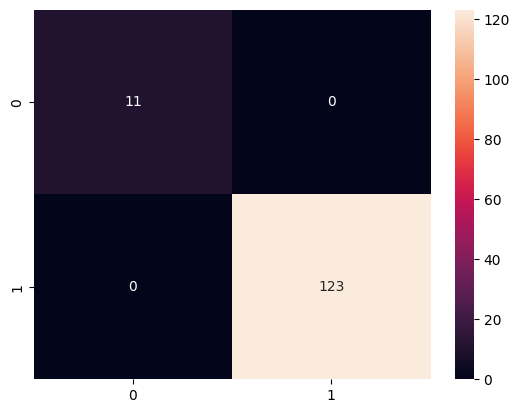

In [60]:
weigths = grid_result.best_params_['class_weight']
model = svm.SVC(gamma='scale', class_weight=weigths)
model.fit(X_train.values, y_train.values)
y_pred = model.predict(X_valid.values)

print("Classification Report:")
print(classification_report(y_valid, y_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_valid,y_pred),annot = True,fmt='d')

In [61]:
pickle.dump(model, open('./models/svc.pkl', 'wb'))

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import classification_report

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC', 'Precision', 'Recall'])
callback = EarlyStopping(monitor='AUC', patience=3)
# Fit the model to the training data
model.fit(np.asarray(X_train).astype('float32'), np.asarray(y_train).astype('float32'), epochs=50, batch_size=64, class_weight={0: 6, 1: 1}, callbacks=[callback])

Epoch 1/50
19/19 [==============================] - 1s 6ms/step - loss: 0.9091 - accuracy: 0.9174 - auc: 0.6955 - precision: 0.9368 - recall: 0.9753
Epoch 2/50
19/19 [==============================] - 0s 6ms/step - loss: 0.4510 - accuracy: 0.9591 - auc: 0.9839 - precision: 0.9915 - recall: 0.9635
Epoch 3/50
19/19 [==============================] - 0s 7ms/step - loss: 0.1981 - accuracy: 0.9883 - auc: 0.9984 - precision: 0.9972 - recall: 0.9900
Epoch 4/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0641 - accuracy: 0.9975 - auc: 1.0000 - precision: 1.0000 - recall: 0.9973
Epoch 5/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0258 - accuracy: 0.9992 - auc: 1.0000 - precision: 0.9991 - recall: 1.0000
Epoch 6/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0157 - accuracy: 0.9983 - auc: 1.0000 - precision: 1.0000 - recall: 0.9982
Epoch 7/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0068 - accuracy: 1.0000 - auc: 1

In [63]:
# Predict on the test data
y_pred = model.predict(np.asarray(X_valid).astype('float32'))

# Convert predictions to binary labels
y_pred_binary = np.round(y_pred)

# Generate classification report
report = classification_report(np.asarray(y_valid).astype('float32'), y_pred_binary)
print("Classification Report:")
print(report)

5/5 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        11
         1.0       1.00      0.99      1.00       123

    accuracy                           0.99       134
   macro avg       0.96      1.00      0.98       134
weighted avg       0.99      0.99      0.99       134



<Axes: >

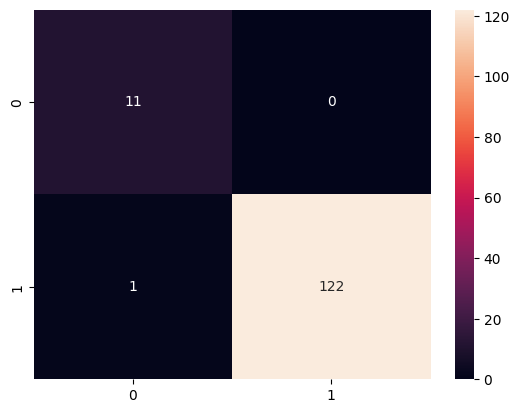

In [64]:
sns.heatmap(confusion_matrix(y_valid,y_pred_binary),annot = True,fmt='d')

In [65]:
model.save('./models/nn.h5')

In [66]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ('gini', 'entropy'),
    'splitter': ('best', 'random'),
    'max_depth': (None, 10, 20, 30)
}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = DecisionTreeClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1')

grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_ , grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.996780 using {'criterion': 'gini', 'max_depth': 20, 'splitter': 'random'}
0.995096 (0.004277) with: {'criterion': 'gini', 'max_depth': None, 'splitter': 'best'}
0.995706 (0.005316) with: {'criterion': 'gini', 'max_depth': None, 'splitter': 'random'}
0.995394 (0.005056) with: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}
0.993582 (0.004959) with: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}
0.995397 (0.005323) with: {'criterion': 'gini', 'max_depth': 20, 'splitter': 'best'}
0.996780 (0.003970) with: {'criterion': 'gini', 'max_depth': 20, 'splitter': 'random'}
0.995237 (0.004381) with: {'criterion': 'gini', 'max_depth': 30, 'splitter': 'best'}
0.995079 (0.004923) with: {'criterion': 'gini', 'max_depth': 30, 'splitter': 'random'}
0.994471 (0.005395) with: {'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}
0.996320 (0.003451) with: {'criterion': 'entropy', 'max_depth': None, 'splitter': 'random'}
0.994471 (0.005520) with: {'criterion': 'ent

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.99      1.00       123

    accuracy                           0.99       134
   macro avg       0.96      1.00      0.98       134
weighted avg       0.99      0.99      0.99       134

Confusion Matrix:


<Axes: >

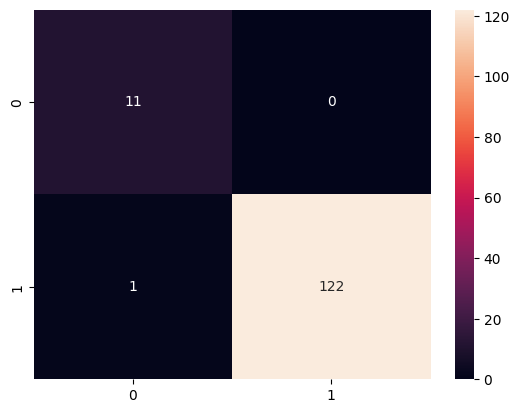

In [67]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=None, splitter='random')
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

print("Classification Report:")
print(classification_report(y_valid, y_pred))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_valid,y_pred),annot = True,fmt='d')

In [68]:
pickle.dump(model, open('./models/dt.pkl', 'wb'))